# Projeto de Análise de Dados com Pandas
# Dados do Titanic analisado com Python 3!

# 1. Introdução 

 Nesse projeto iremos investigar os dados que contém informações sobre os passageiros do Titanic,
que mostram se cada indivíduo morreu ou sobreviveu.
 Faremos uma correspondência entre a classe de cada de cada passageiro e sua sobrevivência para explicitar
 se houve uma preferência a salvar os passageiros das classes mais altas. Também analisaremos a influência de fatores como idade e tarifa paga (ligada à classe no navio) influência a sobrevivência ou não do indivíduo.

 Importando as bibliotecas necessárias!

In [6]:
%matplotlib inline
from datetime import datetime
# importing modules for data anaylysis
import numpy as np
import pandas as pd

# para fazer graficos
import matplotlib.pyplot as plt
# e para fazer graficos mais bonitos!
import seaborn as sns



 Vamos começar a análise importando os dados do Titanic!


In [9]:
file_ti  = 'titanic-data-6.csv'

titanics = pd.read_csv(file_ti)


Mostrando as primeiras linhas do arquivo para termos uma ideia dos dados!


In [11]:
titanics.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


 Analisando as dimensões dos dados!

In [13]:
DimX = titanics.shape[0]
DimY = titanics.shape[1]

print("Temos "+ str(DimX) + " linhas no DataFrame do Titanic.")
print("Temos "+ str(DimY) + " colunas no DataFrame do Titanic.")


Temos 891 linhas no DataFrame do Titanic.
Temos 12 colunas no DataFrame do Titanic.


# 2. Limpeza de Dados

 Vamos ver se há alguma duplicata no dataframe!

In [15]:
titanics.duplicated().all()


False

 logo não há duplicatas no arquivo!

vamos ter uma ideia dos atributos e valores distintos de cada coluna do dataframe!

In [18]:
titanics.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

# 3. Análise Exploratória de Dados

## PERGUNTA 1
### Aqui serão utilizadas funcionalidades do Python para analisar  qual o sexo predominante, masculino ou feminino.  Igualmente pode-se investigar qual a idade média das pessoas e como ela está distribuída.

In [22]:
titanics["Sex"].describe()

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object

Da descrição acima podemos concluir que:
Temos 891 entradas, sendo que haviam diversas duplicatas e valores que não eram números
 só temos dois valores, portanto, "masculino" ou "feminino"
o sexo que mais aparece é o masculino, com frequencia 577, logo temos 314 (891-577) do sexo feminino

In [26]:
titanics["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

 Analisando a idade média vemos que ela é de aproximadamente 30 anos.
 O desvio padrão da idade media é relativamente grande, correspondendo à aproximadamente 
 metade do valor médio da idade, ou seja, há um perfil bem variado de pessoas. 
 O valor mínimo que corresponde a 0.42 deve ser um recém nascido, e o valor máximo, 
 que corresponde a 80 anos, é uma pessoa bem idosa para a época.


## PERGUNTA 2

### Com respeito à tarifa paga, como ela está distribuída?


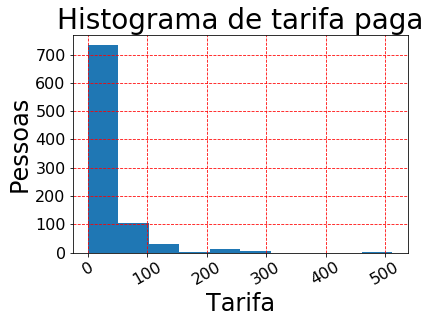

In [35]:
all_fare = titanics['Fare']
all_fare.hist()
plt.xticks(rotation=30,size=16)
plt.yticks(size=16)
plt.grid(linestyle="--",color='r')
plt.title('Histograma de tarifa paga',size=28)
plt.xlabel("Tarifa",size=24)
plt.ylabel("Pessoas",size=24)
plt.show()


Do gráfico acima vemos que um enorme número de pessoas foram de classe "econômica".
Pode-se inferir claramente nesses dados uma distribuição centradas em três valores,
mostrando a existencia de três classes.
Diminui muito o número de pessoas viajando em primeira e segunda classe!

## PERGUNTA 3

### Vamos analisar abaixo o caso de sobrevivência, ou não, em função de quanto foi pago o que deve ser indicador se a classe social mais elevada foi previlegiada.

In [23]:
### são tres classes de passageiros, vamos agora filtrar agora por classe

def class_titanics(titanics,Class):
    """
    Input: titanics-> o dataframe a ser analisado
           Class -> a classe que vai ser analisada
    Output: retorna o dataframe dado como parametro filtrando os dados onde
    a coluna 'PClass' é igual a Class.
    """
    return titanics[titanics['Pclass']==Class]['Pclass'].count()

p1= class_titanics(titanics,1)
p2= class_titanics(titanics,2)
p3= class_titanics(titanics,3)

print(p1,p2,p3)
### verificando se o total de pessoas nas três classes é igual ao total!
print(p1+p2+p3 == titanics.shape[0])

216 184 491
True


Vamos agora fazer um histograma de quantas morreram por classe

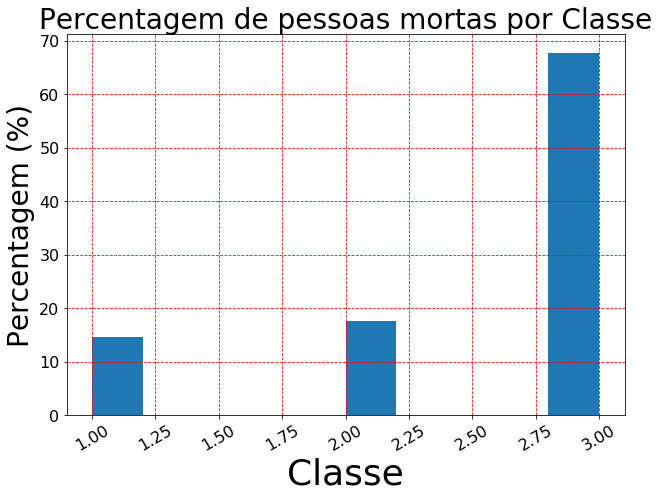

In [42]:
class_died = titanics[titanics['Survived']==0]['Pclass']
#class_surv= class_surv/class_surv.sum()
class_died.hist( weights =100* np.ones_like(class_died.index)/len(class_died.index),figsize=(10,7))
#locations=bins
#labels = ['1','2','3',]
plt.xticks(rotation=30,size=16)
plt.yticks(size=16)
plt.grid(linestyle="--",color='r')
plt.title('Percentagem de pessoas mortas por Classe',size=28)
plt.xlabel("Classe",size=36)
plt.ylabel("Percentagem (%)",size=28)
plt.show()





A partir do histograma acima podemos inferir que muito mais pessoas da terceira classe
morreram. Será que as primeiras classes foram previlegiadas em detrimento da terceira classe?

### Agora fazemos um histograma dos sobreviventes por classe!

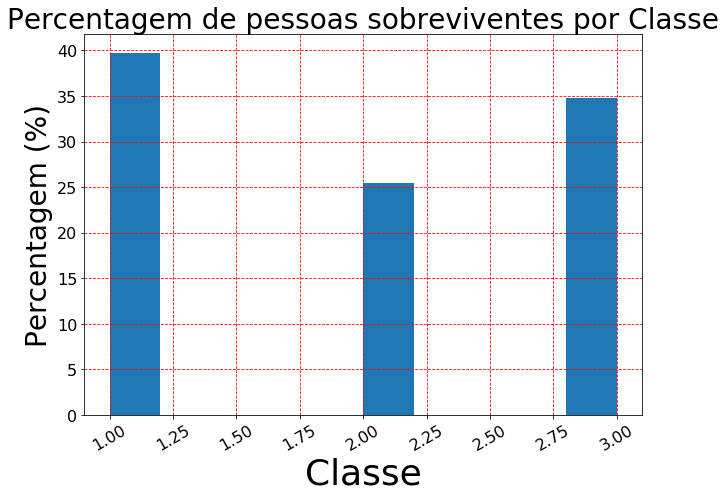

In [46]:

class_surv = titanics[titanics['Survived']==1]['Pclass']

class_surv.hist( weights =100* np.ones_like(class_surv.index)/len(class_surv.index),figsize=(10,7))
plt.xticks(rotation=30,size=16)
plt.yticks(size=16)
plt.grid(linestyle="--",color='r')
plt.title('Percentagem de pessoas sobreviventes por Classe',size=28)
plt.xlabel("Classe",size=36)
plt.ylabel("Percentagem (%)",size=28)
plt.show()



Podemos notar que a terceira classe teve um número semelhante de sobreviventes do que as classes mais altas.
No entanto, há muito mais pessoas da terceira classe, o que vem a mostrar que relativamente ela foi prejudicada.



Vamos analisar agora os sobreviventes com relação à população inicial de cada classe!
Assim as coisas ficarão mais claras

/home/vagner/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


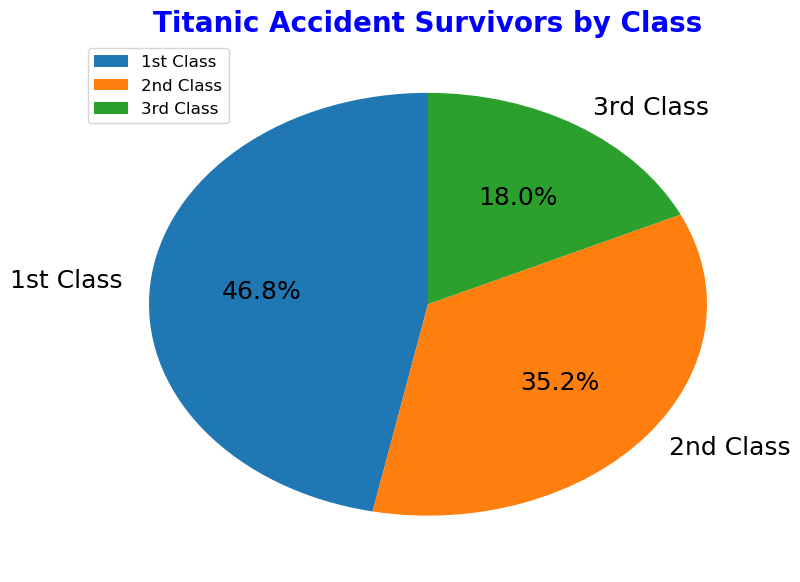

In [49]:


ages_group = titanics[titanics['Survived']==1]
agesurv_1=ages_group.query('Pclass==1')['Pclass'].count()/p1
agesurv_2=ages_group.query('Pclass==2')['Pclass'].count()/p2
agesurv_3=ages_group.query('Pclass==3')['Pclass'].count()/p3

list_ages = [agesurv_1,agesurv_2,agesurv_3]

ages_0_to_80 = pd.Series(list_ages, index = ['1a Classe','2a Classe','3a Classe'])
labels=['1st Class','2nd Class','3rd Class']

plt.figure(figsize=(9,7),dpi=100)
ages_0_to_80.plot(kind='pie',subplots=True,
                  autopct='%1.1f%%', 
 startangle=90, shadow=False, fontsize=18,labels=labels,legend=True,x='V')
plt.title('Titanic Accident Survivors by Class',size=20,color='b',weight='bold')
plt.axes().set_ylabel(' ')
plt.legend(loc='upper left',fontsize=12)
plt.show()


Do gráfico acima podemos concluir que a taxa relativa de sobrevivência da primeira classe
é quase três vezes maior que a da terceira classe!!!
Ainda, a segunda classe tem uma taxa de sobrevivência aproximadamente duas vezes maior
que a terceira classe
## SIM! As primeiras classes foram previlegiadas!!!!


Agora analisando com respeito aos que não sobreviveram

/home/vagner/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


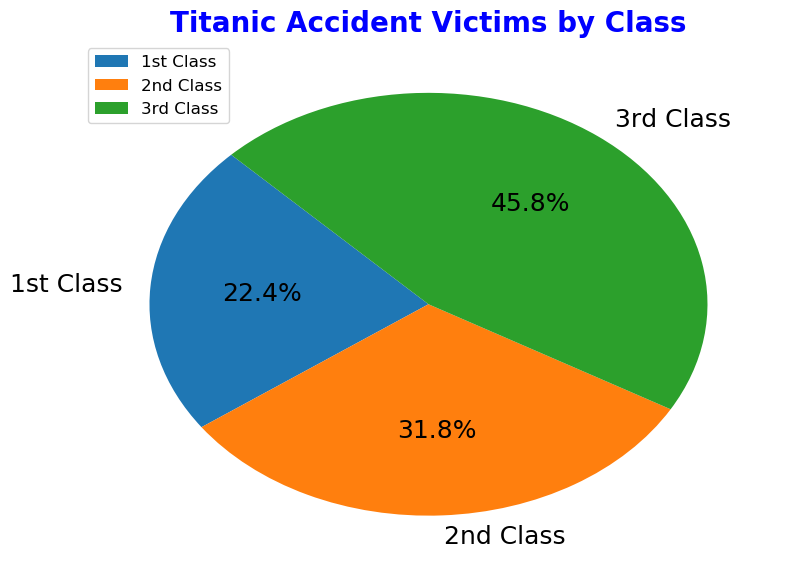

In [51]:



ages_group = titanics[titanics['Survived']==0]
agenotsurv_1=ages_group.query('Pclass==1')['Pclass'].count()/p1
agenotsurv_2=ages_group.query('Pclass==2')['Pclass'].count()/p2
agenotsurv_3=ages_group.query('Pclass==3')['Pclass'].count()/p3

list_ages = [agenotsurv_1,agenotsurv_2,agenotsurv_3]

ages_0_to_80 = pd.Series(list_ages, index = ['1a Classe','2a Classe','3a Classe'])



# plot chart
labels=['1st Class','2nd Class','3rd Class']
#explode=(0,0,.00,.00,.0,.0)

#plt.ylabel=''
plt.figure(figsize=(9,7),dpi=100)
ages_0_to_80.plot(kind='pie',subplots=True,
                  autopct='%1.1f%%', 
 startangle=135, shadow=False, fontsize=18,labels=labels,legend=True,x='V')
#plt.ylabel=''
plt.title('Titanic Accident Victims by Class',size=20,color='b',weight='bold')
plt.axes().set_ylabel(' ')
# plot table
plt.legend(loc='upper left',fontsize=12)
plt.show()


Do gráfico em forma de torta acima é explicitado que as primeiras classes tem taxa relativa
de mortalidade muito menor que a terceira classe!



## PERGUNTA 4
### Com relação aos sobreviventes, como a idade está distribuída?


/home/vagner/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


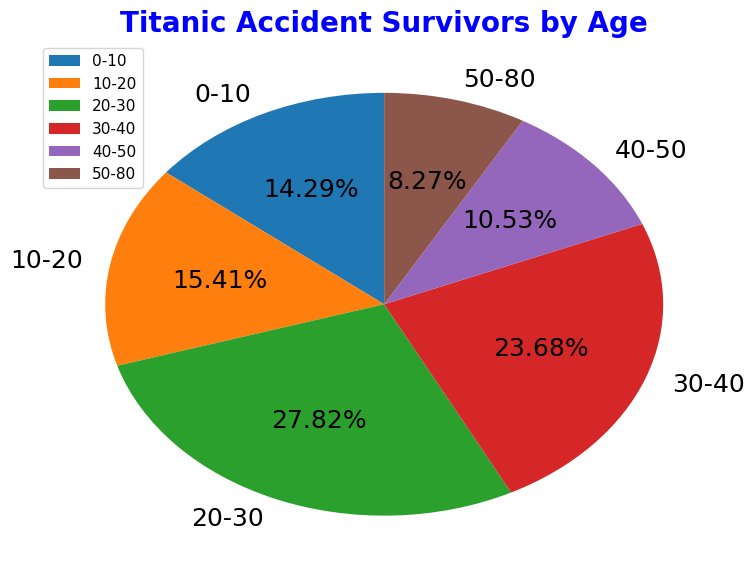

In [54]:
ages_group = titanics[titanics['Survived']==1]
ages_10=ages_group.query('Age > 0 & Age <10')['Parch'].count()
ages_20=ages_group.query('Age > 10 & Age <20')['Parch'].count()
ages_30=ages_group.query('Age > 20 & Age <30')['Parch'].count()
ages_40=ages_group.query('Age > 30 & Age <40')['Parch'].count()
ages_50=ages_group.query('Age > 40 & Age <50')['Parch'].count()
ages_60=ages_group.query('Age > 50 ')['Parch'].count()

list_ages = [ages_10,ages_20,ages_30,ages_40,ages_50,ages_60]

ages_0_to_80 = pd.Series(list_ages, index = ['0-10','10-20','20-30','30-40',
        '40-50','50-80'])



labels=['0-10','10-20','20-30','30-40',
        '40-50','50-80']

plt.figure(figsize=(9,7),dpi=100)
ages_0_to_80.plot(kind='pie',subplots=True,
                  autopct='%1.2f%%', 
 startangle=90, shadow=False, fontsize=18,labels=labels,legend=True,x='V')
plt.title('Titanic Accident Survivors by Age',size=20,color='b',weight='bold')
plt.axes().set_ylabel(' ')
plt.legend(loc='upper left',fontsize=11)
plt.show()

Do gráfico acima fica claro que as pessoas com idade entre 20 a 40 anos,
enquanto que as pessoas mais idosas foram defavorecidas!

# 4. Conclusões
## Nesse projeto analisamos os dados de sobreviventes do Titanic e podemos inferir o seguinte:
### - havia mais pessoas do sexo masculino do que feminino no Titanic;
### com relação à idade das pessoas no Titanic, a média era de 30 anos com uma ampla distribuição de idades ao redor desse valor;
### haviam muito mais pessoas na terceira classe do que na primeira classe;
### - as pessoas na faixa etária entre 20 e 40 anos foram as que tiveram maior número de sobreviventes, em detrimento das pessoas mais idosas;
### a terceira classe teve percentualmente muito maior número de vítimas no aciente do Titanic, ou seja, em especial a primeira classe foi muito favorecida quando tiveram que escolher um grupo de pessoas para salvar do naufrágio do navio. Cabe ressaltar que essa conclusão é relativa à população inicial de cada classe, ou seja, o valor inicial da terceira classe, que é muito maior do que o da primeira classe, não interfere nisso.

# Limitações

### Nessa análise foram levados em conta os dados de 891 passageiros do titanic, sendo que no total haviam muito mais!
